In [9]:
import Pkg; Pkg.add("StatsBase")

   Resolving package versions...
    Updating `~/.julia/environments/v1.9/Project.toml`
⌅ [2913bbd2] + StatsBase v0.33.21
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
Precompiling project...
  ✓ Plots → FileIOExt
  ✓ Plots → UnitfulExt
  2 dependencies successfully precompiled in 4 seconds. 223 already precompiled. 5 skipped during auto due to previous errors.


In [46]:
using Plots, StatsBase
μ, σ, n = 1.5, 0.7, 1000

(1.5, 0.7, 1000)

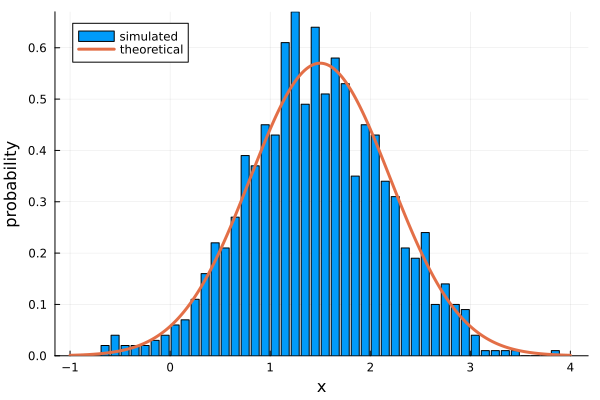

In [48]:
# Generate data
x = μ .+ σ .* randn(n)

# Create histogram
h = fit(Histogram, x, nbins=50)
width = h.edges[1][2] - h.edges[1][1]
y = h.weights / sum(h.weights * width)

# Plot histogram
bar(h.edges[1], y, label="simulated", xlabel="x", ylabel="probability", legend=:topleft)

# Define PDF function
pdf(x, μ, σ) = 1/(σ * sqrt(2π)) * exp(-0.5 * ((x - μ) / σ)^2)

# Generate theoretical PDF
xt = -1:0.01:4
yt = pdf.(xt, μ, σ)

# Plot theoretical PDF
plot!(xt, yt, linewidth=3, label="theoretical")

In [52]:
# I just learned about Julia's broadcasting functionality

add(a, b) = a + b

# Create two arrays of numbers
array1 = [1, 2, 3, 4, 5]
array2 = [10, 20, 30, 40, 50]

# Use broadcasting to apply the add function element-wise to the arrays
result = add.(array1, array2)

# Print the result
println(result)

[11, 22, 33, 44, 55]


In [53]:
using Random
function make_spiral(rng::AbstractRNG, n_samples::Int=1000)
    t_min = 1.5π
    t_max = 4.5π

    t = rand(rng, n_samples) * (t_max - t_min) .+ t_min

    x = t .* cos.(t)
    y = t .* sin.(t)

    permutedims([x y], (2, 1))
end

make_spiral(n_samples::Int=1000) = make_spiral(Random.GLOBAL_RNG, n_samples)

make_spiral (generic function with 4 methods)

In [54]:
function normalize_zero_to_one(x)
    x_min, x_max = extrema(x)
    x_norm = (x .- x_min) ./ (x_max - x_min)
    x_norm
end

function normalize_neg_one_to_one(x)
    2 * normalize_zero_to_one(x) .- 1
end

normalize_neg_one_to_one (generic function with 1 method)

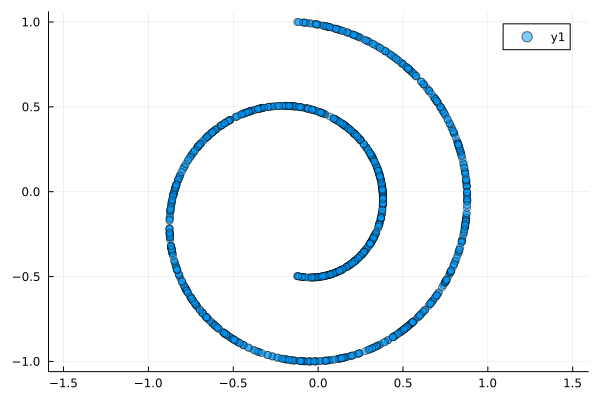

In [65]:
using Plots
n_samples = 1000
X = normalize_neg_one_to_one(make_spiral(n_samples))
scatter(X[1, :], X[2, :], 
    alpha=0.5,
    aspectratio=:equal,
    )
